In [1]:
import os
import rosbag
from data_loader.ros_msg.pointcloud import PointCloud
from data_loader.ros_msg.image import Image
from data_loader.ros_msg.odometry import Odometry
from data_loader.calib.intrinsic_extrinsic_loader import IntrinsicExtrinsicLoader
from tools.utils import *

platform = 'ugv'
sequence_name = 'ugv_parking00'
dataset_path = '/Rocket_ssd/dataset/data_FusionPortable/sensor_data'

In [2]:
##### Set up the rosbag path
rosbag_path = os.path.join(dataset_path, sequence_name + '.bag')

##### Set up the message topic list for different platforms
if platform == 'handheld':
  from cfg.dataset.cfg_handheld import dataset_sensor_frameid_dict
  from cfg.dataset.cfg_handheld import dataset_rostopic_msg_frameid_dict
elif platform == 'ugv':
  from cfg.dataset.cfg_ugv import dataset_sensor_frameid_dict
  from cfg.dataset.cfg_ugv import dataset_rostopic_msg_frameid_dict
elif platform =='vehicle':
  from cfg.dataset.cfg_vehicle import dataset_sensor_frameid_dict
  from cfg.dataset.cfg_vehicle import dataset_rostopic_msg_frameid_dict
elif platform == 'legged':
  from cfg.dataset.cfg_legged import dataset_sensor_frameid_dict
  from cfg.dataset.cfg_legged import dataset_rostopic_msg_frameid_dict
  if sequence_name == 'legged_grass00':
    dataset_sensor_frameid_dict, dataset_rostopic_msg_frameid_dict = \
      filter_sensor('event', dataset_sensor_frameid_dict, dataset_rostopic_msg_frameid_dict)

for key, value in dataset_sensor_frameid_dict.items():
  print('Sensor: {:<30}, Frame_id: {:<15}'.format(key, value[0]))

print('Finish loading parameters')

Sensor: 3dm_gnss_left                 , Frame_id: 3dm_gnss00     
Sensor: 3dm_gnss_right                , Frame_id: 3dm_gnss01     
Sensor: 3dm_imu                       , Frame_id: 3dm_imu        
Sensor: 3dm_mag                       , Frame_id: 3dm_imu        
Sensor: 3dm_nav                       , Frame_id: 3dm_nav        
Sensor: ouster                        , Frame_id: ouster00       
Sensor: ouster_imu                    , Frame_id: ouster00_imu   
Sensor: event_left_camera             , Frame_id: event_cam00    
Sensor: event_left_imu                , Frame_id: event_cam00_imu
Sensor: event_right_camera            , Frame_id: event_cam01    
Sensor: event_right_imu               , Frame_id: event_cam01_imu
Sensor: frame_left_camera             , Frame_id: frame_cam00    
Sensor: frame_right_camera            , Frame_id: frame_cam01    
Sensor: stim300_imu                   , Frame_id: body_imu       
Finish loading parameters


In [3]:
##### Open the rosbag
input_bag = rosbag.Bag(rosbag_path)
print('Finish reading bag, start loading messages, and writing messages to data folder')
print('Will save messages to {}'.format(os.path.join(dataset_path, sequence_name, 'raw_data')))

##### Initialize the lidar object of Sensor class
# Ouster
if 'ouster' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Ouster messages...')
  pointcloud = PointCloud(sensor_type='ouster')
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'points')
  num_msg = pointcloud.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['ouster_points'][0])
  print('     Saving {} Ouster points messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'nearir_image')
  ouster_nearir_image = Image(sensor_type='ouster', msg_type=dataset_rostopic_msg_frameid_dict['ouster_nearir_image'][1])
  num_msg = ouster_nearir_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['ouster_nearir_image'][0])
  print('     Saving {} Ouster nearir_image messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'range_image')
  ouster_range_image = Image(sensor_type='ouster', msg_type=dataset_rostopic_msg_frameid_dict['ouster_range_image'][1])
  num_msg = ouster_range_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['ouster_range_image'][0])
  print('     Saving {} Ouster range_image messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'reflec_image')
  ouster_reflec_image = Image(sensor_type='ouster', msg_type=dataset_rostopic_msg_frameid_dict['ouster_reflec_image'][1])
  num_msg = ouster_reflec_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['ouster_reflec_image'][0])
  print('     Saving {} Ouster reflec_image messages !'.format(num_msg))
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'ouster00', 'singal_image')
  ouster_signal_image = Image(sensor_type='ouster', msg_type=dataset_rostopic_msg_frameid_dict['ouster_signal_image'][1])
  num_msg = ouster_signal_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['ouster_signal_image'][0])
  print('     Saving {} Ouster signal_image messages !'.format(num_msg))
  print('Finishing loading Ouster messages !')

# Frame_left
if 'frame_left_image' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Frame_left messages...')
  frame_left_image = Image(sensor_type='frame_cam', msg_type=dataset_rostopic_msg_frameid_dict['frame_left_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'frame_cam00', 'image')
  num_msg = frame_left_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['frame_left_image'][0])
  print('     Saving {} Frame_left image messages !'.format(num_msg))
  print('Finishing loading Frame_left messages!')

# Frame_right
if 'frame_right_image' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Frame_right messages...')
  frame_right_image = Image(sensor_type='frame_cam', msg_type=dataset_rostopic_msg_frameid_dict['frame_right_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'frame_cam01', 'image')
  num_msg = frame_right_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['frame_right_image'][0])
  print('     Saving {} Frame_right image messages !'.format(num_msg))
  print('Finishing loading Frame_right messages!')

# Vehicle Frame_left
if 'vehicle_frame_left_image' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Vehicle Frame_left messages...')
  vehicle_frame_left_image = Image(sensor_type='frame_cam', msg_type=dataset_rostopic_msg_frameid_dict['vehicle_frame_left_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam00', 'image')
  num_msg = vehicle_frame_left_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['vehicle_frame_left_image'][0])
  print('     Saving {} Vehicle Frame_left image messages !'.format(num_msg))
  print('Finishing loading Vehicle Frame_left messages!')

# Vehicle Frame_right
if 'vehicle_frame_right_image' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Vehicle Frame_right messages...')
  frame_right_image = Image(sensor_type='frame_cam', msg_type=dataset_rostopic_msg_frameid_dict['vehicle_frame_right_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam01', 'image')
  num_msg = frame_right_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['vehicle_frame_right_image'][0])
  print('     Saving {} Vehicle Frame_right image messages !'.format(num_msg))
  print('Finishing loading Vehicle Frame_right messages!')

# Event_right
if 'event_left_image' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Event_left messages...')
  event_left_image = Image(sensor_type='event_left', msg_type=dataset_rostopic_msg_frameid_dict['event_left_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam00', 'image')
  num_msg = event_left_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['event_left_image'][0])
  print('     Saving {} Event_left image messages !'.format(num_msg))
  print('Finishing loading Event_left messages!')

# Event_right
if 'event_right_image' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading Event_right messages...')
  event_right_image = Image(sensor_type='event_right', msg_type=dataset_rostopic_msg_frameid_dict['event_right_image'][1])
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam01', 'image')
  num_msg = event_right_image.load_messages_write_to_file(bag=input_bag, output_path=output_data_path, topic=dataset_rostopic_msg_frameid_dict['event_right_image'][0])
  print('     Saving {} Event_right image messages !'.format(num_msg))
  print('Finishing loading Event_right messages!')

# GPS
if '3dm_gnss_left_fix' in dataset_rostopic_msg_frameid_dict.keys():
  print('Loading GPS messages ...')
  gps_data = np.zeros((0, 6))   # timestamp, lat, lon, alt, speed, accuracy
  output_data_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'gps_data.txt')
  for _, msg, t in input_bag.read_messages(\
    topics=[dataset_rostopic_msg_frameid_dict['3dm_gnss_left_fix'][0]]):
    sec = msg.header.stamp.secs
    nsec = msg.header.stamp.nsecs
    timestamp = sec + nsec * 1e-9    
    vec = np.array([timestamp, msg.latitude, msg.longitude, msg.altitude, np.nan, msg.position_covariance[0]])
    gps_data = np.vstack((gps_data, vec))    

  np.savetxt(output_data_path, gps_data, fmt='%.6f')
  print('Finishing loading GPS messages!')

##### Close the rosbag
input_bag.close()
print('Close the rosbag')

Finish reading bag, start loading messages, and writing messages to data folder
Will save messages to /Rocket_ssd/dataset/FusionPortable_dataset_develop/sensor_data/data_refined/ugv_parking00/raw_data
Loading Ouster messages...
     Saving 1790 Ouster points messages !
     Saving 1790 Ouster nearir_image messages !
     Saving 1790 Ouster range_image messages !
     Saving 1790 Ouster reflec_image messages !
     Saving 1790 Ouster signal_image messages !
Finishing loading Ouster messages !
Loading Frame_left messages...
     Saving 3581 Frame_left image messages !
Finishing loading Frame_left messages!
Loading Frame_right messages...
     Saving 3581 Frame_right image messages !
Finishing loading Frame_right messages!
Loading Event_left messages...
     Saving 3581 Event_left image messages !
Finishing loading Event_left messages!
Loading Event_right messages...
     Saving 3580 Event_right image messages !
Finishing loading Event_right messages!
Close the rosbag


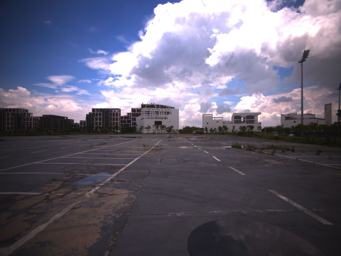

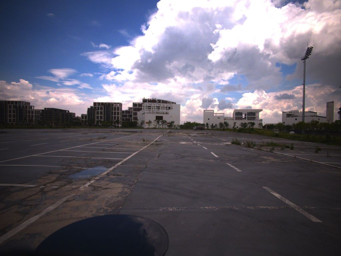

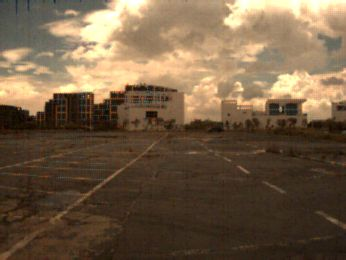

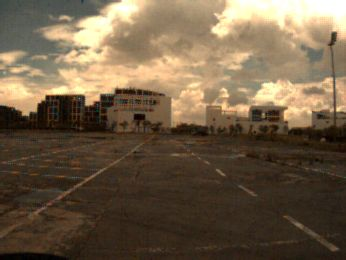

In [4]:
# TEST: visualize data
from PIL import Image
from IPython.display import display

frame_id = 0
size_ratio = 3

if platform == 'vehicle':
  img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam00', 'image/data', '{:06d}.png'.format(frame_id))
  img = Image.open(img_path)
  img_fl = img.resize((img.size[0] // size_ratio, img.size[1] // size_ratio))

  img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'vehicle_frame_cam01', 'image/data', '{:06d}.png'.format(frame_id))
  img = Image.open(img_path)
  img_fr = img.resize((img.size[0] // size_ratio, img.size[1] // size_ratio))
else:
  img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'frame_cam00', 'image/data', '{:06d}.png'.format(frame_id))
  img = Image.open(img_path)
  img_fl = img.resize((img.size[0] // size_ratio, img.size[1] // size_ratio))

  img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'frame_cam01', 'image/data', '{:06d}.png'.format(frame_id))
  img = Image.open(img_path)
  img_fr = img.resize((img.size[0] // size_ratio, img.size[1] // size_ratio))

img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam00', 'image/data', '{:06d}.png'.format(frame_id))
img = Image.open(img_path)
img_el = img.resize((img.size[0], img.size[1]))

img_path = os.path.join(dataset_path, sequence_name, 'raw_data', 'event_cam01', 'image/data', '{:06d}.png'.format(frame_id))
img = Image.open(img_path)
img_er = img.resize((img.size[0], img.size[1]))

display(img_fl, img_fr, img_el, img_er)